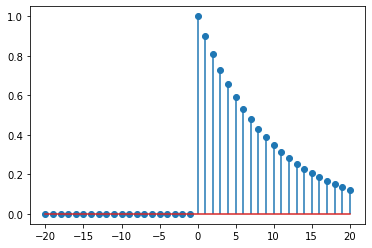

In [1]:
import numpy as np
import matplotlib.pyplot as plt
n=np.arange(-20,21)
x=(9/10)**n
x[n<0]=0
plt.stem(n,x)
plt.show()

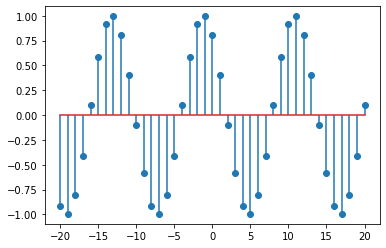

In [2]:
import numpy as np
import matplotlib.pyplot as plt
n=np.linspace(-20,20,41)
x=np.cos(n*np.pi/6 + np.pi/5)
plt.stem(n,x)
plt.show()


<ipython-input-3-76bc60238da7>:4: RuntimeWarning: invalid value encountered in true_divide
  x=np.sin(n*np.pi/6)/(n*np.pi/6)


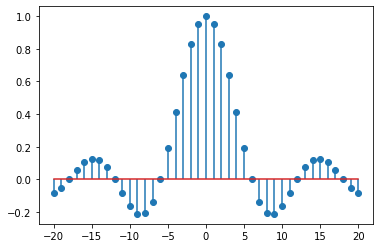

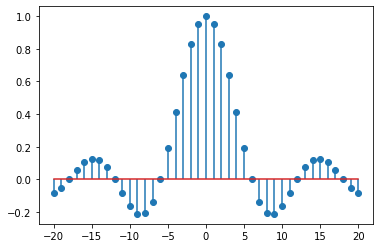

In [3]:
import numpy as np
import matplotlib.pyplot as plt
n=np.arange(-20,21)
x=np.sin(n*np.pi/6)/(n*np.pi/6)
x[n==0]=1
plt.stem(n,x)
plt.show()
x=np.sinc(n/6)
plt.stem(n,x)
plt.show()

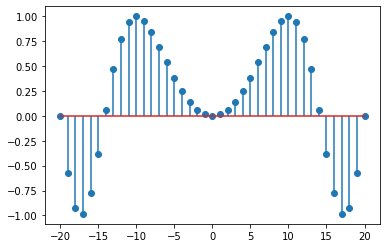

In [4]:
import numpy as np
import matplotlib.pyplot as plt
n=np.arange(-20,21)
x=np.sin(np.pi*n*n/200)
plt.stem(n,x)
plt.show()

[0, 0, 0, 0, 2, 4, -3, 1, -5, 4, 7, 0, 0, 0, 0]
[ 0  0  0  0  0  0  0  2  4 -3  1 -5  4  7  0]
[ 2  4 -3  1 -5  4  7  0  0  0  0  0  0  0  0]


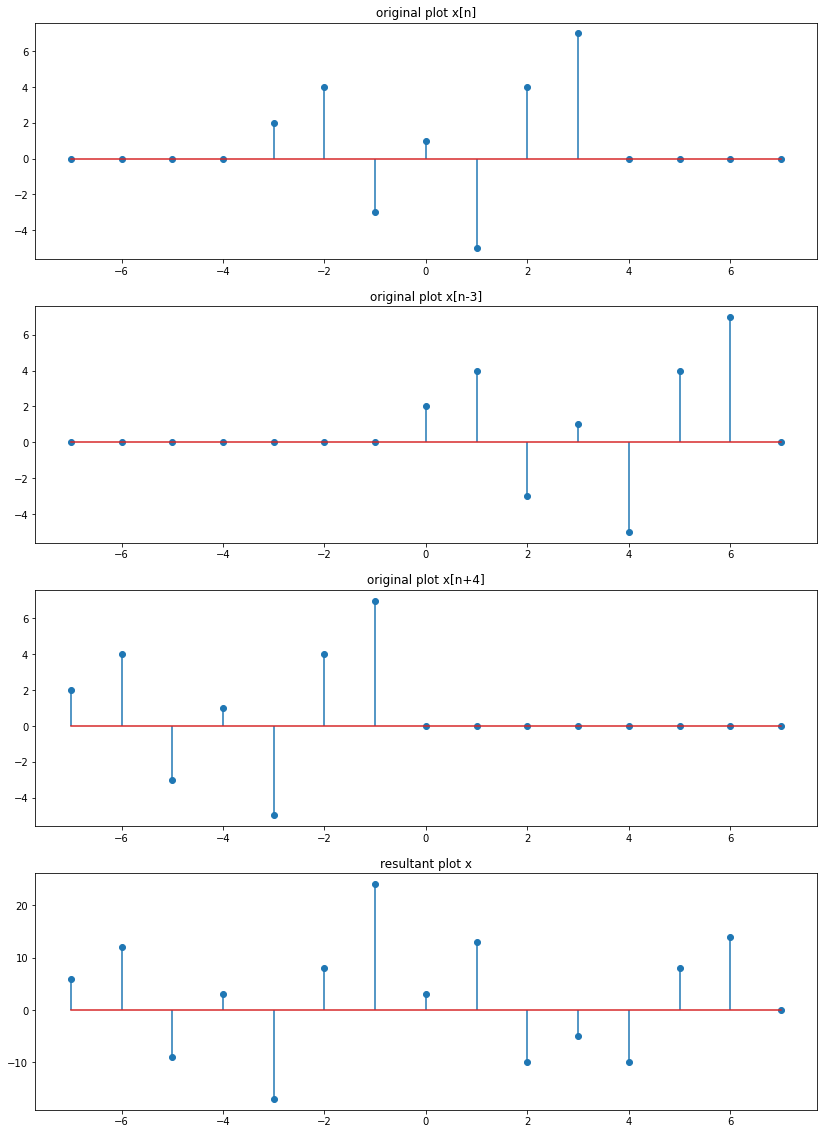

In [5]:
import numpy as np
import matplotlib.pyplot as plt
n=np.arange(-7,8)
x=[2,4,-3,1,-5,4,7];
x_n=4*[0]+x+4*[0]
x1=7*[0]+ x+ 1*[0]
x2=x+ 8*[0]
x=np.array(x_n)
print(x_n)
x1=np.array(x1)
print(x1)
x2=np.array(x2)
print(x2)
fig,ax=plt.subplots(4,1,figsize=(14,20))
ax[0].stem(n,x)
ax[0].set_title("original plot x[n]")
ax[1].stem(n,x1)
ax[1].set_title("original plot x[n-3]")
ax[2].stem(n,x2)
ax[2].set_title("original plot x[n+4]")
ax[3].stem(n,2*x1+3*x2-x)
ax[3].set_title("resultant plot x")
plt.show()

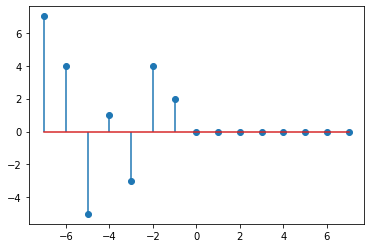

In [6]:
import numpy as np
import matplotlib.pyplot as plt
n=np.arange(-7,8)
x=[2,4,-3,1,-5,4,7];

x_n=np.array(x)
xflip= np.flipud(x_n)
x_req=list(xflip) + 8*[0]
x_req=np.array(x_req)
plt.stem(n,x_req)
plt.show()


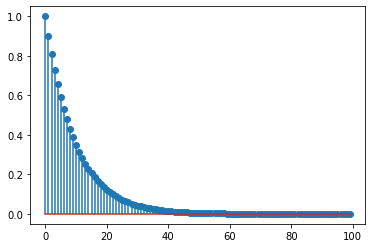

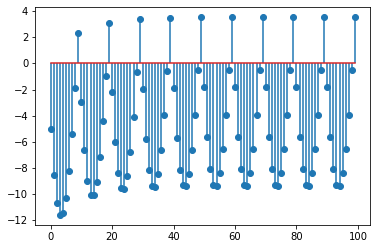

In [7]:
import numpy as np 
import matplotlib.pyplot as plt
import scipy.signal as sig
n=np.arange(100)
b=[1,0]
a=[1,-0.9]
x=[n%10 -5]
system=sig.dlti(b,a)
t1,imp_res=sig.dimpulse(system,x0=None,t=None,n=100)
t2,step_res=sig.dstep(system,x0=None,t=None,n=100)

y=sig.lfilter(b,a,x)
plt.stem(n,np.squeeze(imp_res))
plt.show()
plt.stem(n,np.squeeze(y))
plt.show()

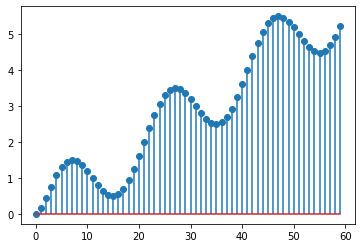

In [8]:
import numpy as np 
import matplotlib.pyplot as plt
import scipy.signal as sig
n=np.arange(60)
x=0.1*n + np.sin(0.1*n*np.pi)
b=[0.4,0.3,0.2,0.1]
a=[1]
y=sig.lfilter(b,a,x)
plt.stem(n,np.squeeze(y))
plt.show()

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import scipy.signal as sig
from scipy.io import wavfile
from IPython.display import Audio
file_in="C:/Users/Aniket/Downloads/violin2.wav"
ni,h=wavfile.read(file_in)
print(ni)
display(Audio(file_in))
b=[1]+ 4409*[0]+[0.8]+4409*[0]+[0.6]
a=[1]
print(len(b))

y=sig.lfilter(b,a,h)
wavfile.write("file_out.wav",ni,y.astype(np.float32))
display(Audio("file_out.wav"))


44100


8821


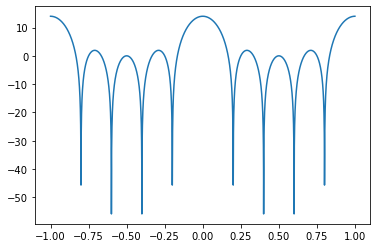

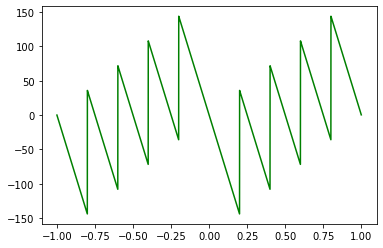

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig

b=np.ones(5)
a=[1,0,0,0,0]
c=np.arange(-2*np.pi,2*np.pi,4*np.pi/4096)
w,h=sig.freqz(b,a,c)
h_db=20*np.log10(abs(h))
plt.plot(w/(2*np.pi),h_db)
plt.show()
angles=np.angle(h,deg=True)
plt.plot(w/(2*np.pi),angles,'g')
plt.show()

In [11]:
%matplotlib widget

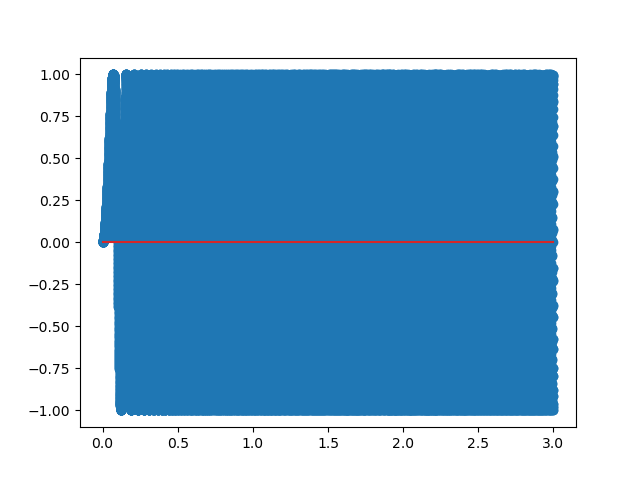

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile 
rate=8192
t=np.arange(0,3,1/rate)
x=1*np.sin(100*np.pi*t*t)
#t'= t[8192:2*8192]
plt.stem(t,x)
plt.show()
wavfile.write("sound_out.wav",8192,x.astype(np.float32))
display(Audio("sound_out.wav"))

In [13]:
%matplotlib inline

[-1.+6.68896751e-09j -1.-6.68896751e-09j] [0.]
[-0.50000001+0.86602541j -0.50000001-0.86602541j -0.49999999+0.8660254j
 -0.49999999-0.8660254j ] []
[-2.61803399  1.         -0.38196601] []
[-1.28781548+0.85789676j -1.28781548-0.85789676j  0.28781548+1.41609308j
  0.28781548-1.41609308j] []


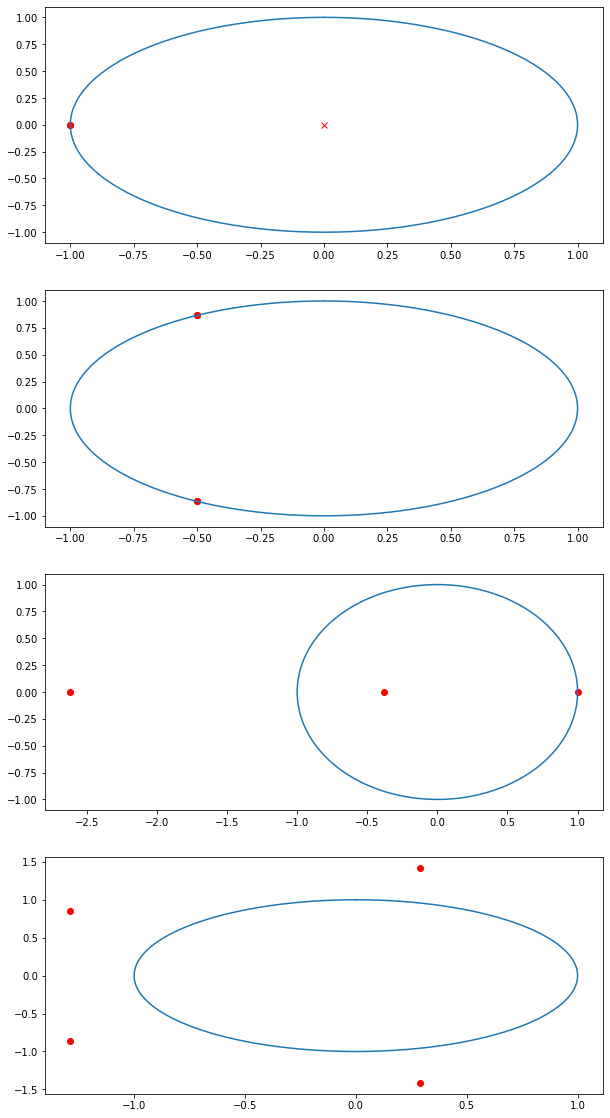

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig
b=[[1,2,1],[1,2,3,2,1],[1,2,-2,-1],[1,2,3,4,5]]
a=[[0,1,0],[1],[1],[1]]

n1 = np.arange(0,np.pi*2,1/100)
fig,ax=plt.subplots(4,1,figsize=(10,20))
for i in range(4):
    z,p,k=sig.tf2zpk(b[i],a[i])
    
    print(z,p)

    ax[i].plot(z.real, z.imag, 'ro', p.real, p.imag, 'rx')
    ax[i].plot(np.sin(n1),np.cos(n1))


plt.show()

C:\Users\Aniket\python3-anaconda\lib\site-packages\scipy\signal\filter_design.py:1630: BadCoefficients: Badly conditioned filter coefficients (numerator): the results may be meaningless
  warnings.warn("Badly conditioned filter coefficients (numerator): the "


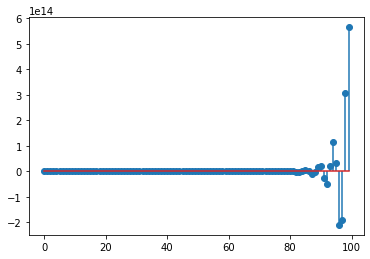

1579828917245203.0


In [15]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig
b=[0,1,0.5]
a=[1,-0.6,2]
system=sig.dlti(b,a)
t,imp_res=sig.dimpulse(system)
plt.stem(t,np.squeeze(imp_res))
plt.show()
ass=np.sum(np.abs(imp_res))
print(ass)

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig
n=np.arange(100)
b=[1,0,0]
a=[1,-1.6,.64]
r,p,k=sig.residuez(b,a)

print("r=",r,"p=",p,"k=",k)

r= [-0.+0.j  1.+0.j] p= [0.8+0.j 0.8+0.j] k= []


C:\Users\Aniket\python3-anaconda\lib\site-packages\scipy\signal\filter_design.py:1630: BadCoefficients: Badly conditioned filter coefficients (numerator): the results may be meaningless
  warnings.warn("Badly conditioned filter coefficients (numerator): the "
C:\Users\Aniket\python3-anaconda\lib\site-packages\scipy\signal\filter_design.py:1630: BadCoefficients: Badly conditioned filter coefficients (numerator): the results may be meaningless
  warnings.warn("Badly conditioned filter coefficients (numerator): the "


zeros for system  1 : [-1.+6.68896751e-09j -1.-6.68896751e-09j]    and Poles for system  1 are [0. 0.]  and k= 1.0 

zeros for system  2 : [-0.50000001+0.86602541j -0.50000001-0.86602541j -0.49999999+0.8660254j
 -0.49999999-0.8660254j ]    and Poles for system  2 are [0. 0. 0. 0. 0.]  and k= 1.0 

zeros for system  3 : [-2.61803399  1.         -0.38196601]    and Poles for system  3 are [0. 0. 0. 0. 0.]  and k= 1.0 

zeros for system  4 : [-1.28781548+0.85789676j -1.28781548-0.85789676j  0.28781548+1.41609308j
  0.28781548-1.41609308j]    and Poles for system  4 are [0. 0. 0. 0. 0.]  and k= 1.0 



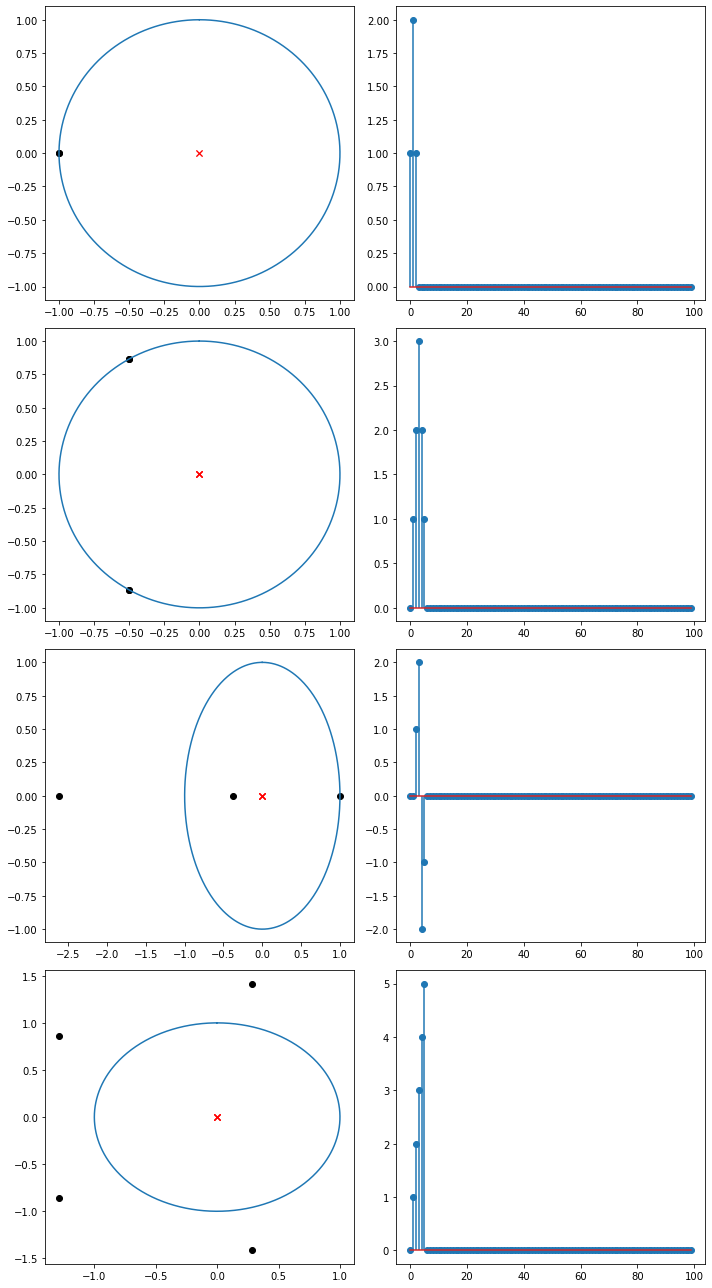

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig
n=np.arange(100)
b=[[0,1,2,1],[1,2,3,2,1],[1,2,-2,-1],[1,2,3,4,5]]
a=[[0,1,0,0],[1,0,0,0,0,0],[1,0,0,0,0,0],[1,0,0,0,0,0]]

n1 = np.arange(0,np.pi*2,1/100)
fig,ax=plt.subplots(4,2,figsize=(10,18))
for i in range(4):
    #finding zeros and poles for each function
    z,p,k=sig.tf2zpk(b[i],a[i])
    
    print("zeros for system ",i+1,":",z, "   and Poles for system ",i+1,"are",p ," and k=",k,"\n")

    ax[i][0].plot(z.real, z.imag, 'ko', p.real, p.imag, 'rx')
    ax[i][0].plot(np.sin(n1),np.cos(n1))

    system=sig.dlti(b[i],a[i])
    t,imp_res=sig.dimpulse(system)
    ax[i][1].stem(t,np.squeeze(imp_res))
fig.tight_layout()   
plt.show()

poles : [0.2472136 +0.76084521j 0.2472136 -0.76084521j 0.71217841+0.62869036j
 0.71305196+0.6277838j  0.74918038+0.58390678j 0.75219712+0.58053358j
 0.78397571+0.53611662j 0.78742012+0.53189436j 0.81703163+0.48450209j
 0.81833318+0.48272546j 0.71217362-0.62869678j 0.71305721-0.62777685j
 0.74916214-0.58392778j 0.75221766-0.58051062j 0.78395005-0.53614154j
 0.78744439-0.53187095j 0.81834328-0.48271707j 0.81702014-0.48451147j]  and zeros : [-0.79283665+0.57602955j -0.79283665-0.57602955j  0.78951396+0.69627893j
  0.78966754+0.69595466j  0.83150092+0.64573284j  0.83198425+0.64459052j
  0.87036305+0.59232277j  0.8708584 +0.59101641j  0.90596172+0.53607632j
  0.90612634+0.53559325j  0.78951343-0.69627858j  0.78966808-0.69595501j
  0.83149806-0.64573302j  0.83198719-0.64459029j  0.87035789-0.59232445j
  0.87086353-0.59101474j  0.90612932-0.53559207j  0.90595867-0.53607754j]


C:\Users\Aniket\python3-anaconda\lib\site-packages\scipy\signal\ltisys.py:3487: ComplexWarning: Casting complex values to real discards the imaginary part
  xout[i+1, :] = (np.dot(system.A, xout[i, :]) +
C:\Users\Aniket\python3-anaconda\lib\site-packages\scipy\signal\ltisys.py:3489: ComplexWarning: Casting complex values to real discards the imaginary part
  yout[i, :] = (np.dot(system.C, xout[i, :]) +
C:\Users\Aniket\python3-anaconda\lib\site-packages\scipy\signal\ltisys.py:3493: ComplexWarning: Casting complex values to real discards the imaginary part
  yout[out_samples-1, :] = (np.dot(system.C, xout[out_samples-1, :]) +
C:\Users\Aniket\python3-anaconda\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\Aniket\python3-anaconda\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return a

<StemContainer object of 3 artists>

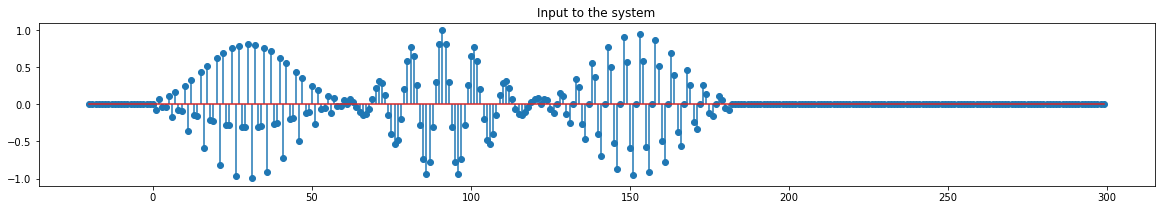

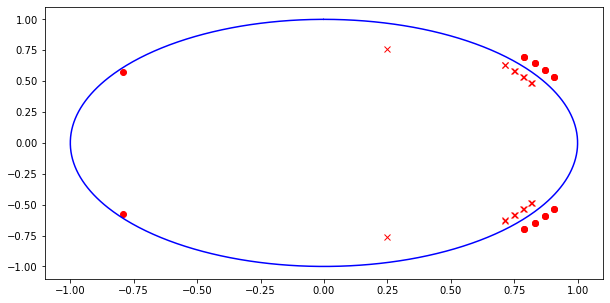

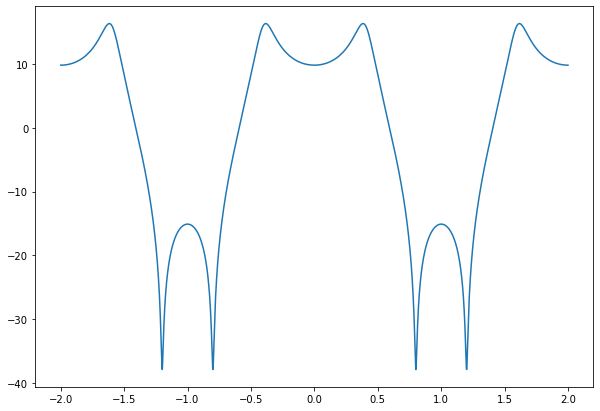

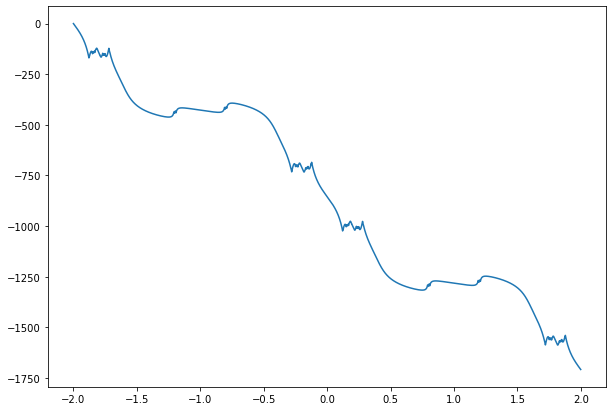

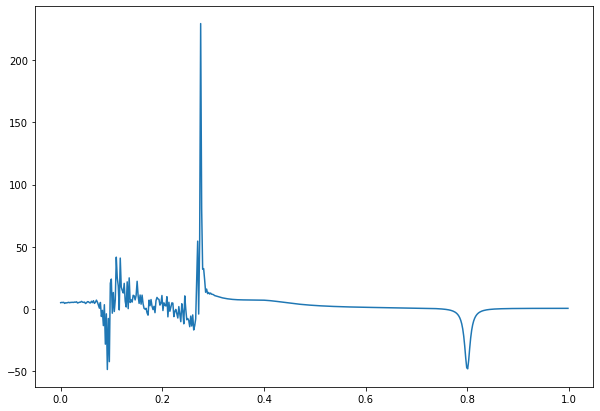

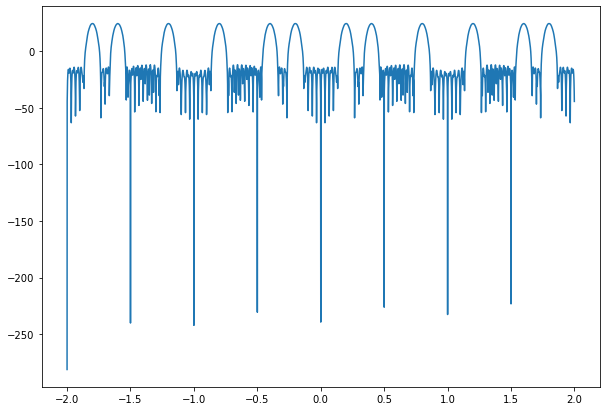

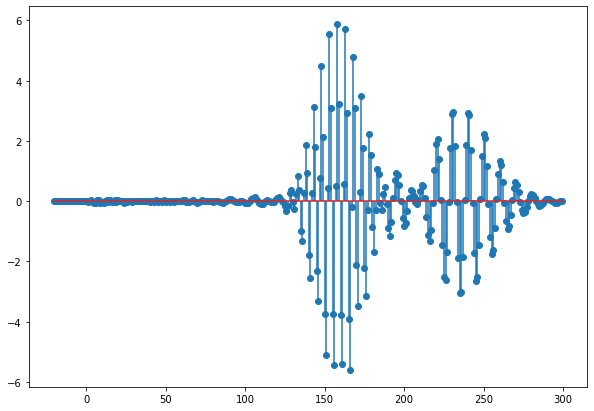

In [5]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy.signal as sig
import numpy.polynomial.polynomial as pm
j=(-1)**0.5
K= [1,2,3,4]
n=np.arange(-20,300)
C=np.arange(-2*np.pi,2*np.pi,4*np.pi/4096)
n1 = np.arange(0,np.pi*2,1/100)

wn=.54-0.46*np.cos(2*np.pi*n/60)
wn[(n<0)]=0
wn[(n>60)]=0

x1n=wn*np.cos(0.2*np.pi*n)
#print(x1n)
x2n=wn*np.cos(0.4*np.pi*n - np.pi/2)
#print(x2n)
x3n=wn*np.cos(0.8*np.pi*n + np.pi/5)
#print(x3n)

xn=[]
for i in np.arange(-20,300,1):
    if (i<0):
        xn.append(0)
    elif (i>0 and i<=60):
        xn.append(x3n[i+20])
    elif(i>61 and i<=121):
        xn.append(x1n[i-61+20])
    elif(i>121 and i<=183):
        xn.append(x2n[i-122+20])
        
    else:
        xn.append(0)

plt1=plt.figure(figsize=(20,3))
plt.stem(n,xn)
plt.title("Input to the system")

b=[1,-2*0.98*np.cos(0.8*np.pi),0.98**2]
a=[1,-2*0.8*np.cos(0.4*np.pi),0.8**2]
#system=sig.dlti(b,a)
#t,imp_res=sig.dimpulse(system)

#b=pm.polymul([1],b)
#a=pm.polymul([1],a)

for i in range(4):
    c=0.95*np.e**(j*(0.15*np.pi +0.02*np.pi*K[i]))
    c_n=np.conj(c)
    
    b_=pm.polymul([c*c_n,-1*(c+c_n),1],[c*c_n,-1*(c+c_n),1])
    a_=pm.polymul([1,-1*(c+c_n),c*c_n],[1,-1*(c+c_n),c*c_n])
    
    b=pm.polymul(b,b_)
    a=pm.polymul(a,a_)
    
system=sig.dlti(b,a)
t,h=sig.dimpulse(system)

#plotting zero-pole

z,p,k=sig.tf2zpk(b,a)
print("poles :",p," and zeros :",z)  

plt2=plt.figure(figsize=(10,5))    
plt.plot(z.real, z.imag, 'ro', p.real, p.imag, 'rx')
plt.plot(np.sin(n1),np.cos(n1),'b')
    

#plotting magnitude spectrum and unwrapped phase of system
plt3=plt.figure(figsize=(10,7))
w,h=sig.freqz(b,a,C)
hdb=20*np.log10(abs(h))
plt.plot(w/np.pi,hdb)

plt4=plt.figure(figsize=(10,7))
angles=np.angle(h,deg=True)
unwrapped=np.unwrap(angles)
plt.plot(w/np.pi,unwrapped)

plt5=plt.figure(figsize=(10,7))
w,gd=sig.group_delay((b,a))
plt.plot(w/np.pi,gd)

#plotting input dtft
plt6=plt.figure(figsize=(10,7))
aa=np.array(20*[0] + [1])
W,H=sig.freqz(xn,aa,C)
Hdb=20*np.log10(abs(H))
plt.plot(W/np.pi,Hdb)

#plotting output response to input
plt7=plt.figure(figsize=(10,7))
y=sig.lfilter(b,a,xn)
plt.stem(n,y)

In [47]:
?(dimpulse)

Object `(dimpulse)` not found.


In [48]:
?scipy.signal.dimpulse

Object `scipy.signal.dimpulse` not found.


In [50]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy.signal as sig
#?sig.dimpulse
help(sig.lfilter)
sig.freqz()

Help on function lfilter in module scipy.signal.signaltools:

lfilter(b, a, x, axis=-1, zi=None)
    Filter data along one-dimension with an IIR or FIR filter.
    
    Filter a data sequence, `x`, using a digital filter.  This works for many
    fundamental data types (including Object type).  The filter is a direct
    form II transposed implementation of the standard difference equation
    (see Notes).
    
    The function `sosfilt` (and filter design using ``output='sos'``) should be
    preferred over `lfilter` for most filtering tasks, as second-order sections
    have fewer numerical problems.
    
    Parameters
    ----------
    b : array_like
        The numerator coefficient vector in a 1-D sequence.
    a : array_like
        The denominator coefficient vector in a 1-D sequence.  If ``a[0]``
        is not 1, then both `a` and `b` are normalized by ``a[0]``.
    x : array_like
        An N-dimensional input array.
    axis : int, optional
        The axis of the input da

group delay observed from plot is  44.681946595969094


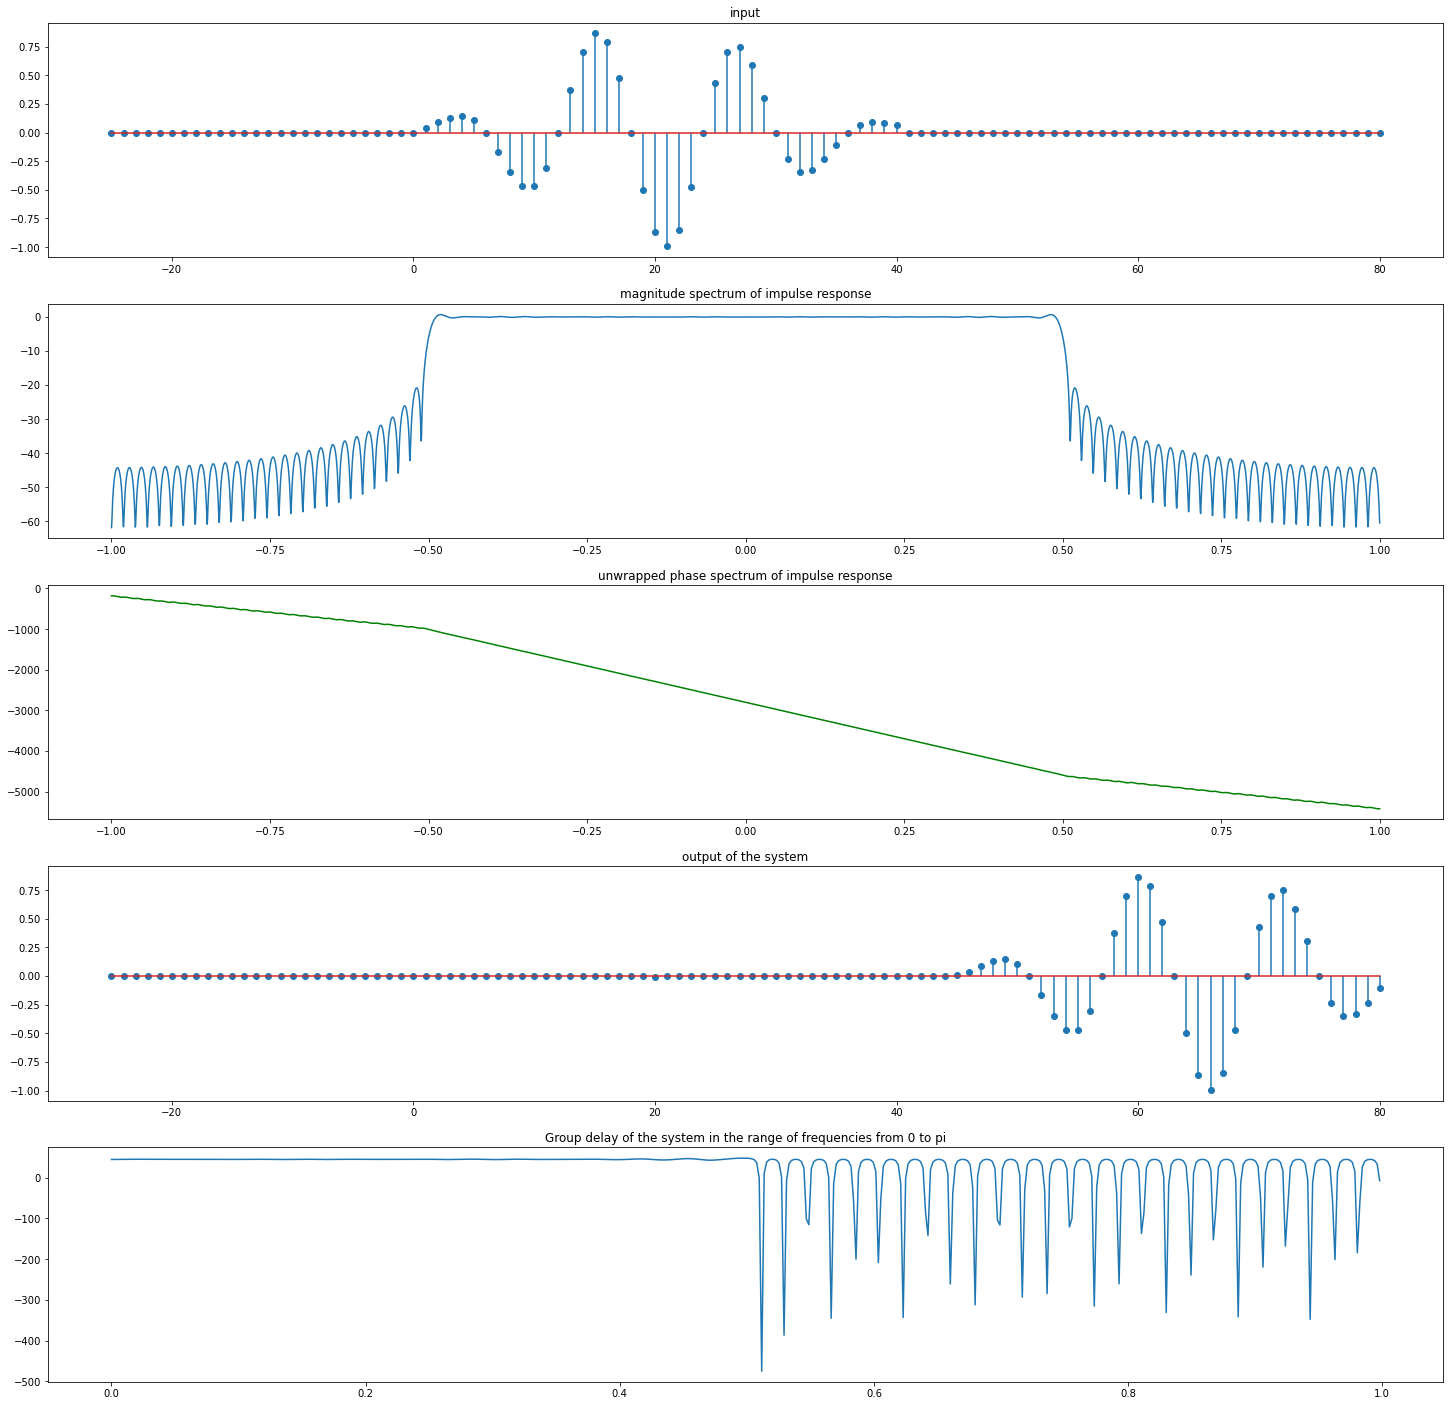

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig

fig , ax = plt.subplots(5,1,figsize=(25,25))


n1=np.arange(-25,81,1)

c=np.arange(-np.pi,np.pi,(2*np.pi)/4096)

i_n=[]


for i in n1:
    if(i>=0 and i<=40):
        i_n.append(np.multiply(np.sin(i*(np.pi/6)),(0.54-0.46*np.cos(i*(np.pi/20)))))
        
    else :
        i_n.append(0)
        

h_n=0.5*np.sinc((n1-20)/2)
a=np.concatenate((np.zeros(25),1),axis=None)
b=np.concatenate((1,np.zeros(80)),axis=None)
        
ax[0].stem(n1,i_n)
ax[0].set_title('input')

w1,h1=sig.freqz(h_n,a,c)
h1db=20*np.log10(abs(h1))
ax[1].plot(w1/(np.pi),h1db)
ax[1].set_title('magnitude spectrum of impulse response')

angles=np.angle(h1,deg=True)
ax[2].plot(w1/(np.pi),np.unwrap(angles),'g')
ax[2].set_title('unwrapped phase spectrum of impulse response')

h=sig.lfilter(h_n,b,i_n)
ax[3].stem(n1,h)
ax[3].set_title('output of the system')

w2,gd=sig.group_delay((h_n,b))
ax[4].plot(w2/np.pi,gd)
ax[4].set_title('Group delay of the system in the range of frequencies from 0 to pi')

print('group delay observed from plot is ',gd[0])

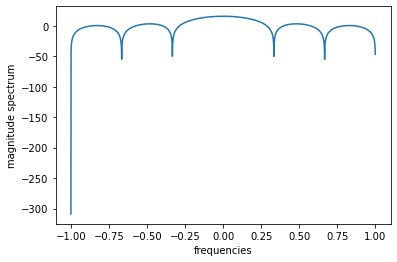

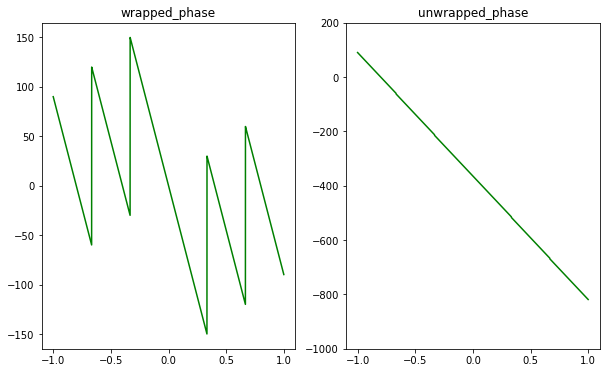

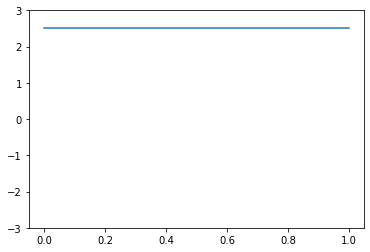

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig
n=np.arange(100)
c=np.arange(-np.pi,np.pi,2*np.pi/4096)
#x_n=np.heaviside(n,1) -np.heaviside(n-6,1)
x_n=[1,1,1,1,1,1]
a=[1,0,0,0,0,0]
w,h=sig.freqz(x_n,a,c)
hdb=20*np.log10(abs(h))
plt.plot(w/np.pi,hdb)
plt.xlabel("frequencies")
plt.ylabel("magnitude spectrum")
plt.show()
angles=np.angle(h,deg=True)
unwrapped=np.unwrap(angles)
fig,ax=plt.subplots(1,2,figsize=(10,6))
ax[0].plot(w/np.pi,angles,'g')
ax[0].set_title("wrapped_phase")
ax[1].plot(w/np.pi,unwrapped,'g')
ax[1].set_title("unwrapped_phase")
ax[1].set_ylim(-1000,200)
plt.show()

w1,gd=sig.group_delay((x_n,a))
plt.plot(w1/np.pi,gd)
plt.ylim(-3,3)
plt.show()

Text(0, 0.5, 'phase plot')

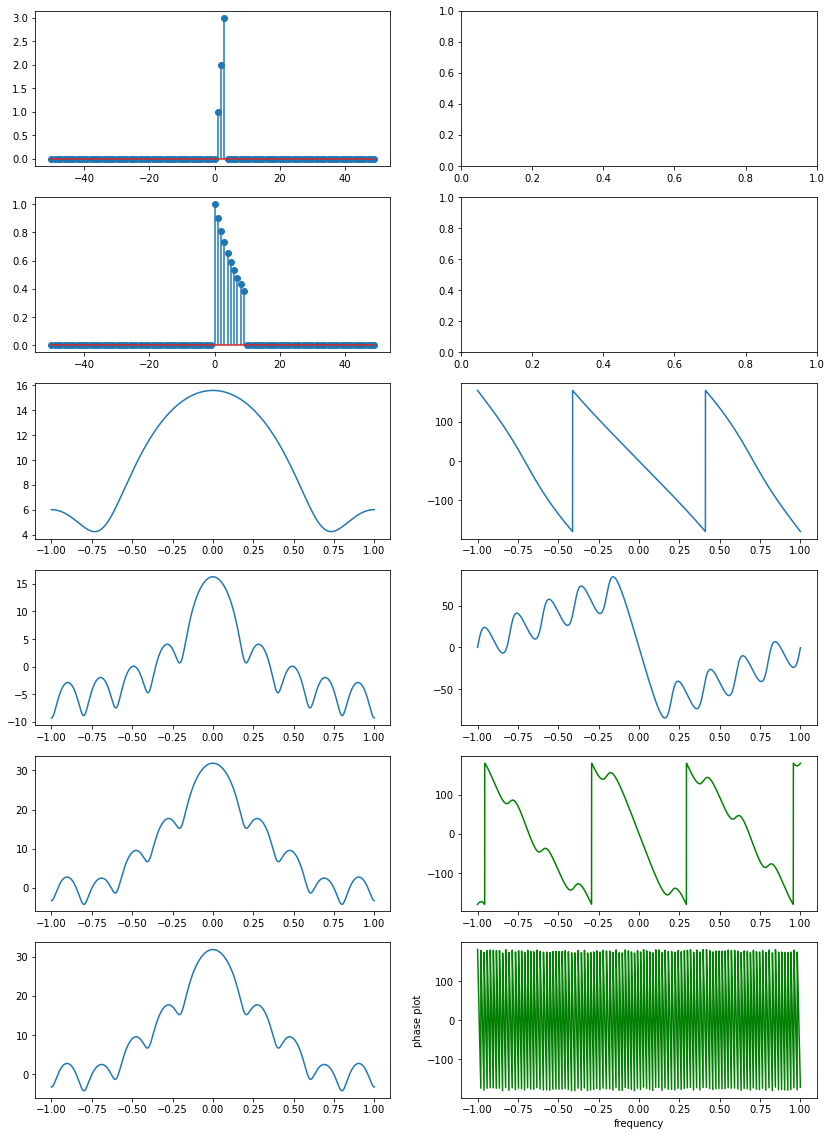

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig
n=np.arange(-50,50,1)

delta=np.heaviside(n,1)-np.heaviside(n-1,1)

fig,ax=plt.subplots(6,2,figsize=(14,20))
c=np.arange(-np.pi,np.pi,2*np.pi/4096)
b1=[0,1,2,3,0,0,0,0,0,0]
a=np.array([1] + 9*[0])


h1=sig.lfilter(b1,a,delta)
ax[0][0].stem(n,np.squeeze(h1))

n_temp=np.arange(10)
b2= np.power(0.9,n_temp)
h2=sig.lfilter(b2,a,delta)
ax[1][0].stem(n,np.squeeze(h2))

y=np.convolve(h1,h2)


w,H1=sig.freqz(b1,a,c)
H1db=20*np.log10(abs(H1))
ax[2][0].plot(w/np.pi,H1db)

angles=np.angle(H1,deg=True)
ax[2][1].plot(w/np.pi,angles)


w,H2=sig.freqz(b2,a,c)
H2db=20*np.log10(abs(H2))
ax[3][0].plot(w/np.pi,H2db)

angles=np.angle(H2,deg=True)
ax[3][1].plot(w/np.pi,angles)

#w,H=sig.freqz(b1,a,c)
Hdb=20*np.log10(abs(H1*H2))
ax[4][0].plot(w/np.pi,Hdb)

angles=np.angle(H1*H2,deg=True)
ax[4][1].plot(w/np.pi,angles,'g')

W,Y=sig.freqz(y,a,c)
Ydb=20*np.log10(abs(Y))
ax[5][0].plot(w/np.pi,Ydb)

Angles=np.angle(Y,deg=True)
ax[5][1].plot(W/np.pi,Angles,'g')
ax[5][1].set_xlabel("frequency")
ax[5][1].set_ylabel("phase plot")


In [35]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig
n=np.arange(100)

z=np.array([-1.28781548+0.85789676j ,-1.28781548-0.85789676j , 0.28781548+1.41609308j ,0.28781548-1.41609308j])
p=[0,0,0,0,0]
k=1
b,a=sig.zpk2tf(z,p,k)
print(b)
print(a)

[1.         2.         3.         4.         5.00000001]
[1. 0. 0. 0. 0. 0.]


[0. 0.] [0.5+0.8660254j 0.5-0.8660254j]


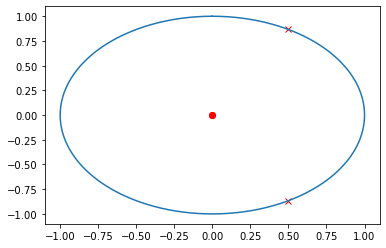

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig

b=[1,0,0]
a=[1,-1,1]
z,p,k =sig.tf2zpk(b,a)
print(z,p)

plt.plot(z.real, z.imag, 'ro', p.real, p.imag, 'rx')
n1 = np.arange(0,np.pi*2,1/100)
plt.plot(np.sin(n1),np.cos(n1))

In [6]:
import scipy.signal as sig
help(sig.tf2zpk)

Help on function tf2zpk in module scipy.signal.filter_design:

tf2zpk(b, a)
    Return zero, pole, gain (z, p, k) representation from a numerator,
    denominator representation of a linear filter.
    
    Parameters
    ----------
    b : array_like
        Numerator polynomial coefficients.
    a : array_like
        Denominator polynomial coefficients.
    
    Returns
    -------
    z : ndarray
        Zeros of the transfer function.
    p : ndarray
        Poles of the transfer function.
    k : float
        System gain.
    
    Notes
    -----
    If some values of `b` are too close to 0, they are removed. In that case,
    a BadCoefficients warning is emitted.
    
    The `b` and `a` arrays are interpreted as coefficients for positive,
    descending powers of the transfer function variable. So the inputs
    :math:`b = [b_0, b_1, ..., b_M]` and :math:`a =[a_0, a_1, ..., a_N]`
    can represent an analog filter of the form:
    
    .. math::
    
        H(s) = \frac
     

<StemContainer object of 3 artists>

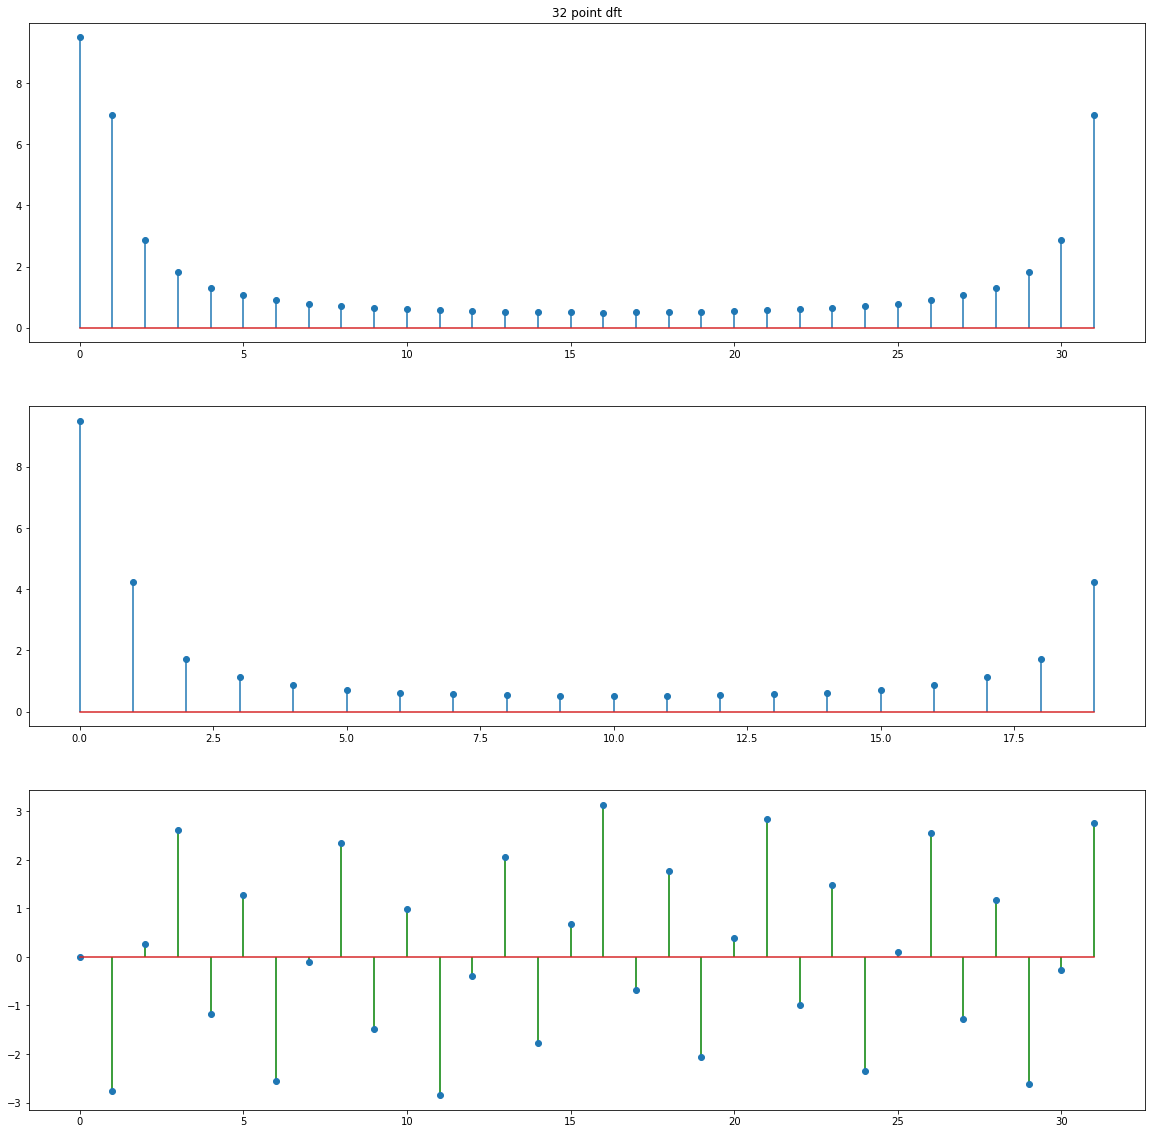

In [5]:
import numpy as np
import matplotlib.pyplot as plt

k=np.arange(32)
xn=0.5*(1-np.cos(np.pi*k/20))
xn[(k<0)]=0
xn[(k>=20)]=0
  #   1)
fig,ax=plt.subplots(3,1,figsize=(20,20))
xk_1=np.fft.fft(xn,32)
angles_1=np.angle(xk_1)
ax[0].stem(k,abs(xk_1))
ax[0].set_title("32 point dft")
ax[2].stem(k,angles_1,'g')

n=np.arange(20)
xn=0.5*(1-np.cos(np.pi*n/20))
xn[(n<0)]=0
xn[(n>=20)]=0
xk=np.fft.fft(xn,20)
ax[1].stem(n,abs(xk))

<StemContainer object of 3 artists>

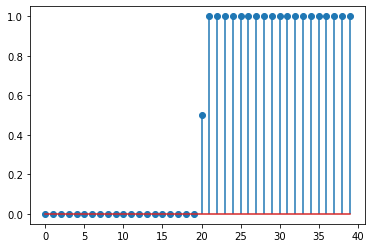

In [3]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy.signal as sig
import numpy.polynomial.polynomial as pm

n=np.arange(40)
xn=np.heaviside(n-20,0.5)
plt.stem(n,xn)

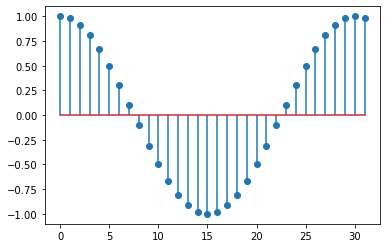

C:\Users\Aniket\python3-anaconda\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\Aniket\python3-anaconda\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


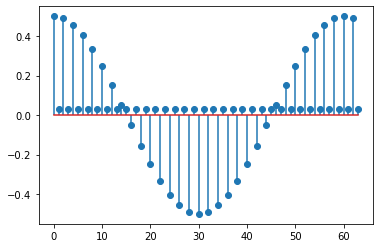

C:\Users\Aniket\python3-anaconda\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


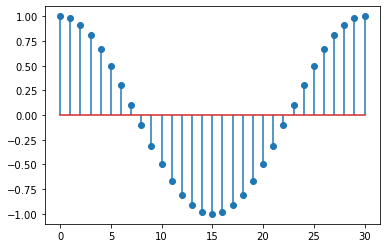

C:\Users\Aniket\python3-anaconda\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


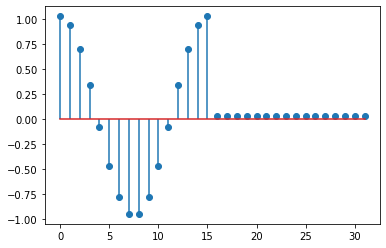

C:\Users\Aniket\python3-anaconda\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\Aniket\python3-anaconda\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


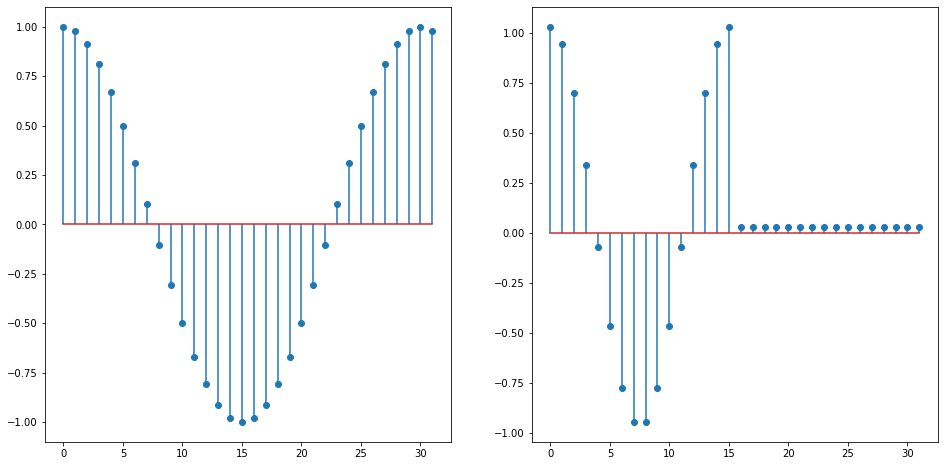

In [18]:
import numpy as np
import matplotlib.pyplot as plt
#fig ,ax=plt.subplots(4,1,figsize=(18,16))
n = np.arange(32)
k=np.arange(64)

x1n=np.cos(n*np.pi/15)
#x2n=np.cos(3*n*np.pi/15)

x1k=np.fft.fft(x1n,32)
x1n_ =np.fft.ifft(x1k,64)
plt.stem(n,x1n)
plt.show()
plt.stem(k,x1n_)
plt.show()

x2k=np.fft.fft(x1n,64)
x2n_ =np.fft.ifft(x2k,64)
plt.stem(k[0:31],x2n_[0:31])
plt.show()

x3k=np.fft.fft(x1n,64)
x3n_ =np.fft.ifft(x3k,32)
plt.stem(n,x3n_)
plt.show()

fig,ax=plt.subplots(1,2,figsize=(16,8))
x5n=np.cos(n*np.pi/15)
x5k=np.fft.fft(x5n,64)
x5n_=np.fft.ifft(x5k,32)
ax[0].stem(n,x5n)
ax[1].stem(n,x5n_)
plt.show()

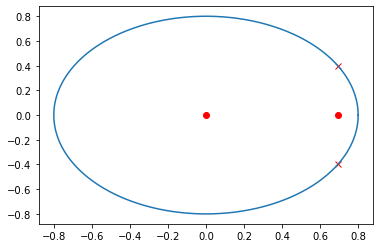

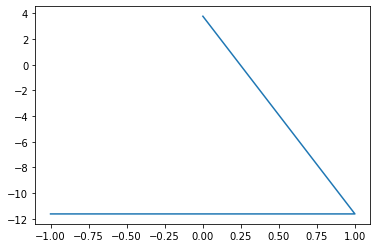

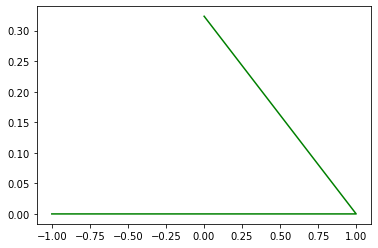

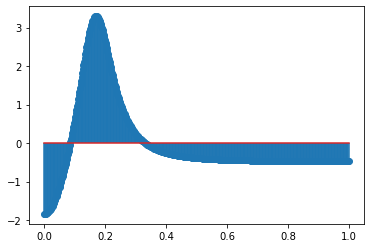

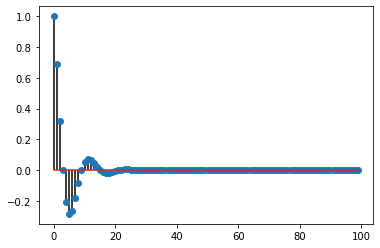

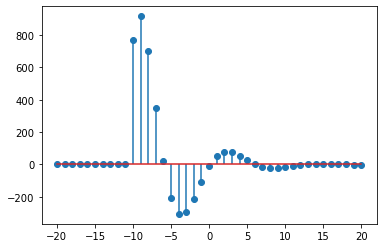

In [27]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy.signal as sig

n=np.arange(51)
n1=np.arange(0,2*np.pi,1/100)
j=(-1)**0.5
z=np.array([0, 0.8*0.5*(3**0.5)])
p=np.array([0.4*(3**0.5) + 0.8*0.5*j,0.4*(3**0.5) - 0.8*0.5*j])
k=1;
plt.plot(z.real,z.imag,'ro',p.real,p.imag,'rx')
plt.plot(0.8*np.cos(n1),0.8*np.sin(n1))
plt.show()

b,a=sig.zpk2tf(z,p,k)
c=(-np.pi,np.pi,2*np.pi/2048)
w,h=sig.freqz(b,a,c)
hdb=20*np.log(abs(h))
plt.plot(w/np.pi,hdb)
plt.show()
angles=np.angle(h,deg=True)
plt.plot(w/np.pi,angles,'g')
plt.show()
w,gd=sig.group_delay((b,a))
plt.stem(w/np.pi,gd)
plt.show()

system=sig.dlti(b,a)
t,imp_res=sig.dimpulse(system)
plt.stem(t,np.squeeze(imp_res),'k')
plt.show()
N=np.arange(-20,21)
xn= 0.5**N - 0.25*(0.5**N)
xn[(N< -10)]=0
xn[(N>10)]=0
y=sig.lfilter(b,a,xn)
plt.stem(N,y)
plt.show()

The energy in the error is  71.28069748500513
the error in signal energy after recovery is  (0.31217295058511857+7.52580499214835e-18j)


<ipython-input-37-9cfee2cb5cda>:31: ComplexWarning: Casting complex values to real discards the imaginary part
  Xk[(nz[0][i])]=xk[nz[0][i]]


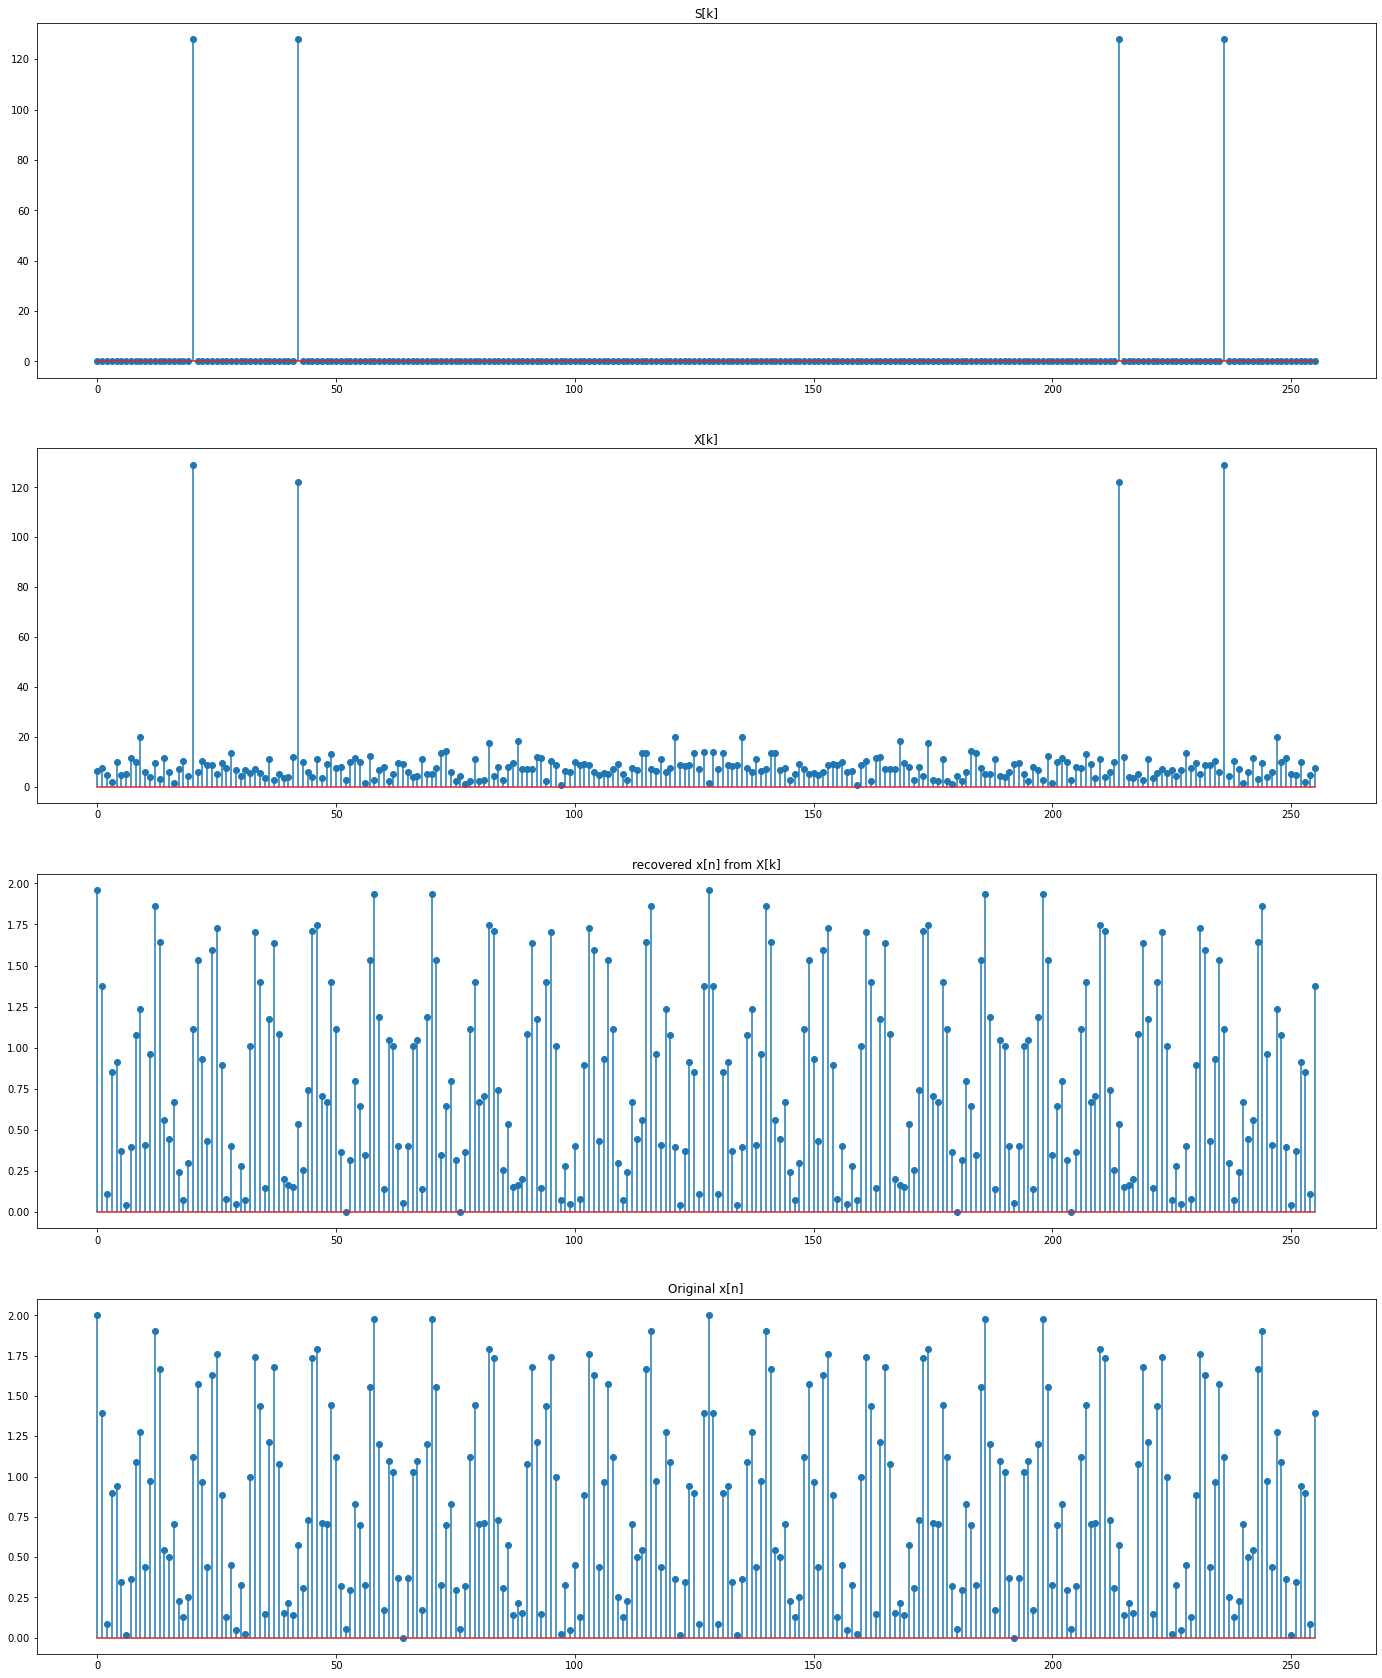

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as rn
n=np.arange(256)
sn=np.cos(5*n*np.pi/32) + np.cos(21*n*np.pi/64)
#   generating noisy signal
en=rn.default_rng().normal(0,np.sqrt(0.3),sn.shape)
#plt.plot(n,sn)
xn= sn + en
#plt.plot(n,xn)

#    calculatimng energy in error signal
energy=np.sum((xn-sn)**2)
print("The energy in the error is ",energy)


fig,ax=plt.subplots(4,1,figsize=(24,30))
sk=np.fft.fft(sn,256)
xk=np.fft.fft(xn,256)

ax[0].stem(n,abs(sk))
ax[0].set_title("S[k]")
ax[1].stem(n,abs(xk))
ax[1].set_title("X[k]")

nz=np.where(sk>=1)

#     2)
Xk=np.zeros(256)
for i in range(len(nz[0])):
    Xk[(nz[0][i])]=xk[nz[0][i]]

#computing inverse DFT
Xn=np.fft.ifft(Xk,256)
ax[2].stem(n,abs(Xn))
ax[2].set_title("recovered x[n] from X[k]")
ax[3].stem(n,abs(sn))
ax[3].set_title("Original x[n]")

err_energy=np.sum((Xn-sn)**2)
print("the error in signal energy after recovery is ",err_energy)

The transfer function of the causal system is given by
H(z) = 1 − 2z−1 + 2z−2 − z−3
(1 − z−1) (1 − 0.5z−1) (1 − 0.2z−1)
.
1. Plot the pole zero locations of the system along with the unit circle.
2. Plot the input and output waveforms for 0 ≤ n ≤ 50
if the signal x[n] =



�1
2
�n
cos �π
3n
�
, 0 ≤ n ≤ 20
0, otherwise is given as the input to the system.
3. Plot the group delay of the system.


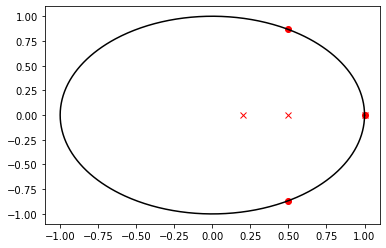

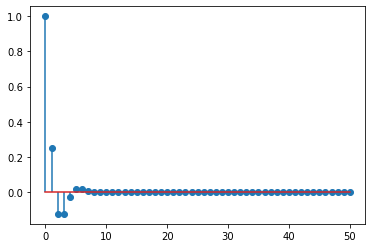

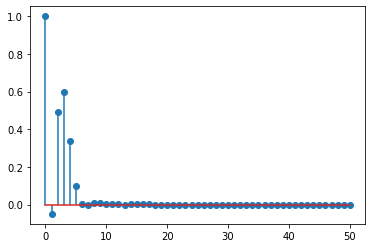

C:\Users\Aniket\python3-anaconda\lib\site-packages\scipy\signal\filter_design.py:688: UserWarning: The group delay is singular at frequencies [0.000], setting to 0
  warnings.warn(


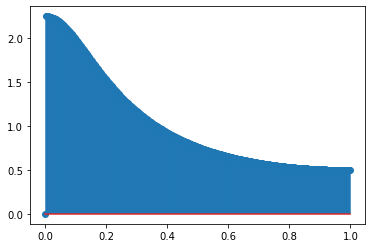

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig

n=np.arange(51)
n1=np.arange(0,2*np.pi,1/100)
b=[1,-2,2,-1]
a=[1,-1.7,0.8,-0.1]
z,p,k=sig.tf2zpk(b,a)
plt.plot(z.real,z.imag,'ro',p.real,p.imag,'rx')
plt.plot(np.cos(n1),np.sin(n1),'k')
plt.show()

xn=(0.5**n)*np.cos(np.pi*n/3)
xn[(n>20)]=0
plt.stem(n,xn)
plt.show()
y=sig.lfilter(b,a,xn)
plt.stem(n,y)
plt.show()

w,gd=sig.group_delay((b,a))
plt.stem(w/np.pi,gd)
plt.show()

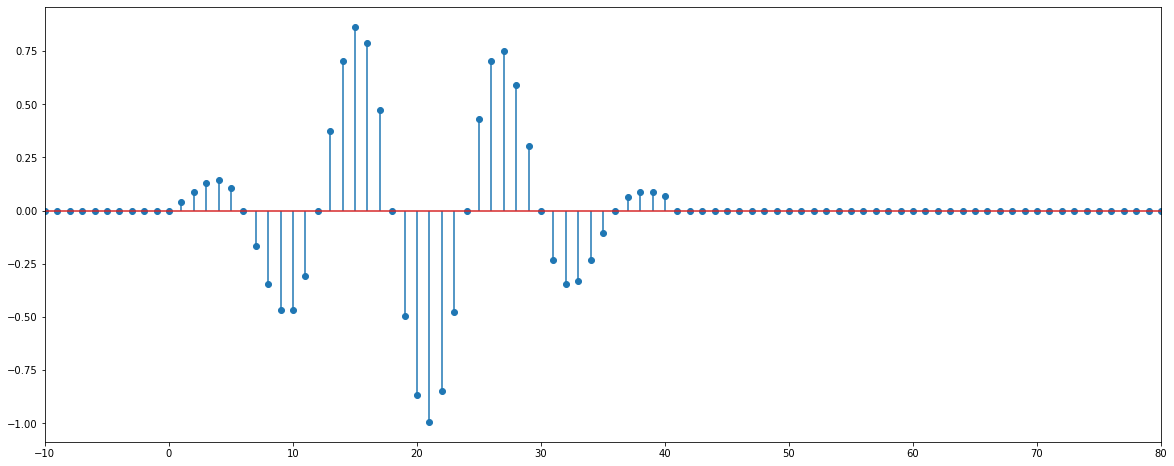

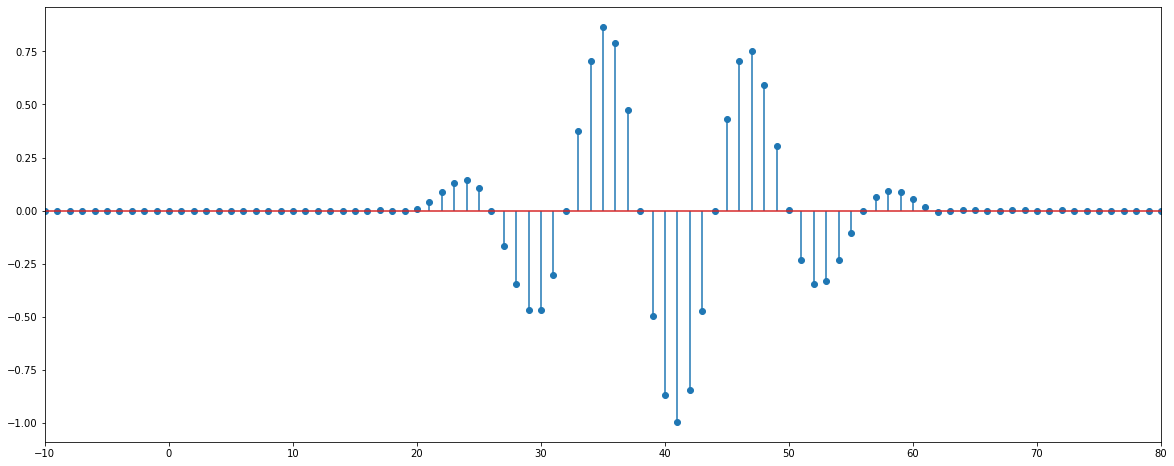

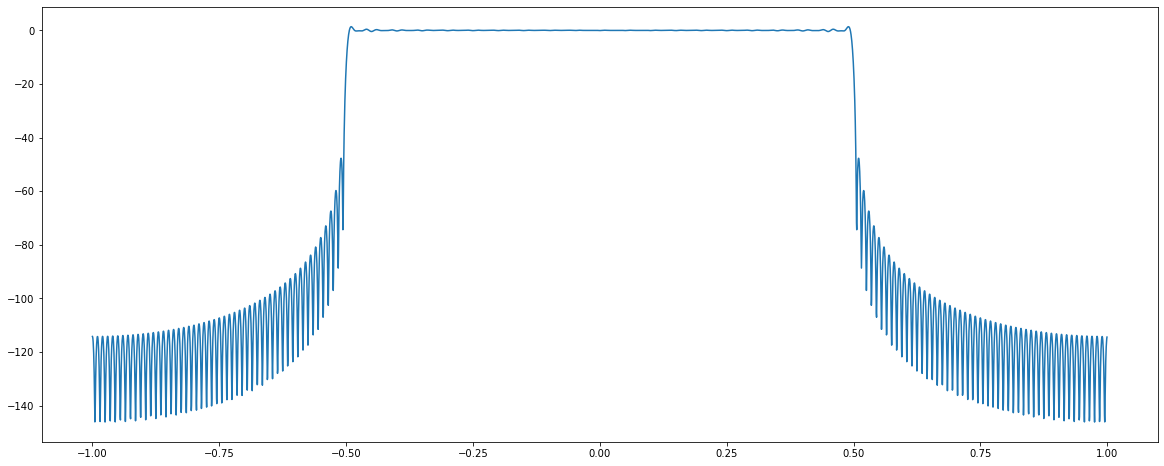

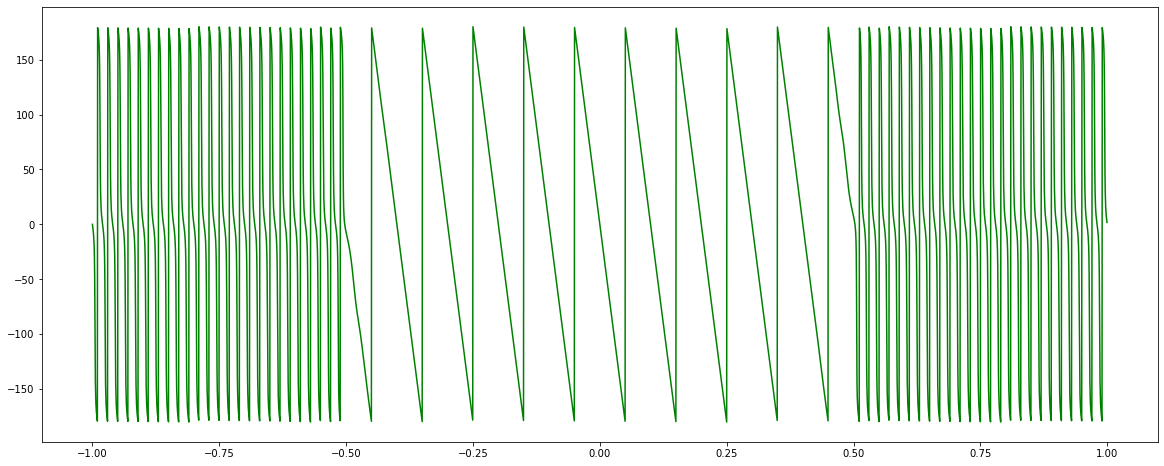

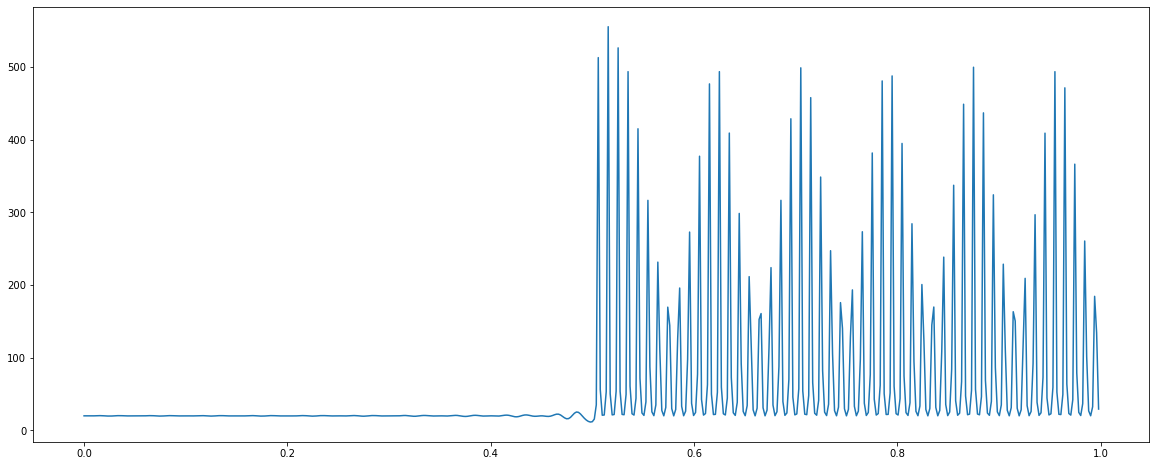

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig

n=np.arange(-100,101)
c=np.arange(-np.pi,np.pi,2*np.pi/4096)
wn = 0.54 - 0.46*np.cos(2*np.pi*n/40)
wn[(n<0)]=0
wn[(n>40)]=0

xn=wn*np.sin(np.pi*n/6)

hn=0.5*np.sinc((n-20)/2)
plt0=plt.figure(figsize=(20,8))
plt.stem(n,xn)
plt.xlim(-10,80)
plt.show()

a=np.array(100*[0] +[1] +100*[0])
#y=sig.lfilter(hn,a,xn)

plt1=plt.figure(figsize=(20,8))
y=np.convolve(xn,hn,'same')
plt.stem(n,y)
plt.xlim(-10,80)
plt.show()


plt2=plt.figure(figsize=(20,8))
w,h=sig.freqz(hn,a,c)
hdb=20*np.log(abs(h))
plt.plot(w/np.pi,hdb)
plt.show()

plt3=plt.figure(figsize=(20,8))
angles=np.angle(h,deg=True)
plt.plot(w/np.pi,angles,'g')
plt.show()

plt4=plt.figure(figsize=(20,8))
w2,gd=sig.group_delay((hn,a))
plt.plot(w2/np.pi,gd)
plt.show()